In [1]:
import IPython.display as ipd
import librosa as alib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings as fw
fw('ignore')

In [2]:
ipd.Audio('genres_original/blues/blues.00000.wav')

In [3]:
df = pd.read_csv('features_30_sec.csv')

In [4]:
df

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.002827             1784.165850          129774.064525   
1    0.002373             1530.176679          375850.073649   
2    0.002746             1552.811865          156467.643368   
3    0.006346             1070.106615          184355.942417   
4    0.002303             1835.004266          343399.939274   
..        ...                     ...                    ...   
995  0.000345             2008.149458          282174.689224   
996  0.000588             2006.843354          182114.709510   
997  0.000322             2077.526598          231657.968040   
998  0.001211             1398.699344          240318.731073   
999  0.000336             1609.795082          422203.216152   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                2002.449060            85882.761315  ...   52.420910   
1                2039.036516           213843.755497  ...   55.356403   
2                1747.702312            76254.192257  ...   40.598766   
3                1596.412872           166441.494769  ...   44.427753   
4                1748.172116            88445.209036  ...   86.099236   
..                       ...                     ...  ...         ...   
995              2106.541053            88609.749506  ...   45.050526   
996              2068.942009            82426.016726  ...   33.851742   
997              1927.293153            74717.124394  ...   33.597008   
998              1818.450280           109090.207161  ...   46.324894   
999              1797.213044           120115.632927  ...   59.167755   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0      -1.690215   36.524071    -0.408979   41.597103    -2.303523   
1      -0.731125   60.314529     0.295073   48.120598    -0.283518   
2      -7.729093   47.639427    -1.816407   52.382141    -3.439720   
3      -3.319597   50.206673     0.636965   37.319130    -0.619121   
4      -5.454034   75.269707    -0.916874   53.613918    -4.404827   
..           ...         ...          ...         ...          ...   
995   -13.289984   41.754955     2.484145   36.778877    -6.713265   
996   -10.848309   39.395096     1.881229   32.010040    -7.461491   
997   -12.845291   36.367264     3.440978   36.001110   -12.588070   
998    -4.416050   43.583942     1.556207   34.331261    -5.041897   
999    -7.069775   73.760391     0.028346   76.504326    -2.025783   

     mfcc19_var  mfcc20_mean  mfcc20_var  label  
0     55.062923     1.221291   46.936035  blues  
1     51.106190     0.531217   45.786282  blues  
2     46.639660    -2.231258   30.573025  blues  
3     37.259739    -3.407448   31.949339  blues  
4     62.910812   -11.703234   55.195160  blues  
..          ...          ...         ...    ...  
995   54.866825    -1.193787   49.950665   rock  
996   39.196327    -2.795338   31.773624   rock  
997   42.502201    -2.106337   29.865515   rock  
998   47.227180    -3.590644   41.299088   rock  
999   72.189316     1.155239   49.662510   rock  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [6]:
df.describe().T

count          mean           std           min  \
length                   1000.0  6.620308e+05  1.784074e+03  6.600000e+05   
chroma_stft_mean         1000.0  3.786817e-01  8.170489e-02  1.719392e-01   
chroma_stft_var          1000.0  8.633982e-02  7.735298e-03  4.455525e-02   
rms_mean                 1000.0  1.309297e-01  6.568311e-02  5.276444e-03   
rms_var                  1000.0  3.051399e-03  3.634500e-03  4.294372e-06   
spectral_centroid_mean   1000.0  2.201781e+03  7.159606e+02  5.700404e+02   
spectral_centroid_var    1000.0  4.696916e+05  4.008995e+05  7.911251e+03   
spectral_bandwidth_mean  1000.0  2.242541e+03  5.263165e+02  8.980662e+02   
spectral_bandwidth_var   1000.0  1.370792e+05  9.645567e+04  1.078719e+04   
rolloff_mean             1000.0  4.571549e+03  1.574792e+03  7.491406e+02   
rolloff_var              1000.0  1.844345e+06  1.425085e+06  1.468612e+04   
zero_crossing_rate_mean  1000.0  1.036123e-01  4.182089e-02  2.169698e-02   
zero_crossing_rate_var   1000.0  2.986150e-03  3.023513e-03  4.408679e-05   
harmony_mean             1000.0 -3.659332e-04  1.683946e-03 -2.606458e-02   
harmony_var              1000.0  1.253999e-02  1.165332e-02  4.946464e-05   
perceptr_mean            1000.0 -3.953317e-04  1.081984e-03 -7.149944e-03   
perceptr_var             1000.0  5.670073e-03  6.500325e-03  8.299008e-07   
tempo                    1000.0  1.195054e+02  2.826418e+01  5.497839e+01   
mfcc1_mean               1000.0 -1.444730e+02  1.002294e+02 -5.521201e+02   
mfcc1_var                1000.0  3.747875e+03  2.770558e+03  1.745714e+02   
mfcc2_mean               1000.0  9.955428e+01  3.133087e+01 -1.461542e+00   
mfcc2_var                1000.0  7.068995e+02  4.391203e+02  9.310475e+01   
mfcc3_mean               1000.0 -8.920291e+00  2.169068e+01 -8.987019e+01   
mfcc3_var                1000.0  4.682864e+02  2.871435e+02  3.546775e+01   
mfcc4_mean               1000.0  3.629245e+01  1.666467e+01 -1.872755e+01   
mfcc4_var                1000.0  2.204472e+02  1.162369e+02  3.426315e+01   
mfcc5_mean               1000.0 -1.144840e+00  1.222134e+01 -3.889035e+01   
mfcc5_var                1000.0  1.744045e+02  1.007678e+02  2.991201e+01   
mfcc6_mean               1000.0  1.463349e+01  1.183959e+01 -2.841591e+01   
mfcc6_var                1000.0  1.272321e+02  6.847511e+01  2.084792e+01   
mfcc7_mean               1000.0 -5.129038e+00  9.940460e+00 -3.293043e+01   
mfcc7_var                1000.0  1.163670e+02  5.840005e+01  2.902733e+01   
mfcc8_mean               1000.0  1.011917e+01  1.046327e+01 -2.491582e+01   
mfcc8_var                1000.0  8.819899e+01  4.104821e+01  2.246423e+01   
mfcc9_mean               1000.0 -6.994062e+00  8.283921e+00 -3.164057e+01   
mfcc9_var                1000.0  8.856693e+01  3.949407e+01  2.582586e+01   
mfcc10_mean              1000.0  7.729785e+00  7.937309e+00 -1.205018e+01   
mfcc10_var               1000.0  8.173349e+01  3.673365e+01  1.927320e+01   
mfcc11_mean              1000.0 -6.021069e+00  6.817013e+00 -2.805750e+01   
mfcc11_var               1000.0  7.555123e+01  3.813518e+01  2.140276e+01   
mfcc12_mean              1000.0  4.471693e+00  6.715787e+00 -1.579645e+01   
mfcc12_var               1000.0  6.867082e+01  3.262553e+01  1.864252e+01   
mfcc13_mean              1000.0 -4.795884e+00  6.170181e+00 -2.752313e+01   
mfcc13_var               1000.0  6.787171e+01  3.315428e+01  1.729392e+01   
mfcc14_mean              1000.0  1.781900e+00  5.008385e+00 -1.259449e+01   
mfcc14_var               1000.0  6.476410e+01  3.445029e+01  1.425061e+01   
mfcc15_mean              1000.0 -3.869308e+00  4.873599e+00 -1.753913e+01   
mfcc15_var               1000.0  6.287376e+01  3.390410e+01  9.769691e+00   
mfcc16_mean              1000.0  1.148144e+00  4.578948e+00 -1.569384e+01   
mfcc16_var               1000.0  6.073096e+01  3.378195e+01  9.169314e+00   
mfcc17_mean              1000.0 -3.966028e+00  4.549697e+00 -1.723473e+01   
mfcc17_var            

In [7]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [8]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

Text(0.5, 1.0, 'Correlation Heatmap (for the MEAN variables)')

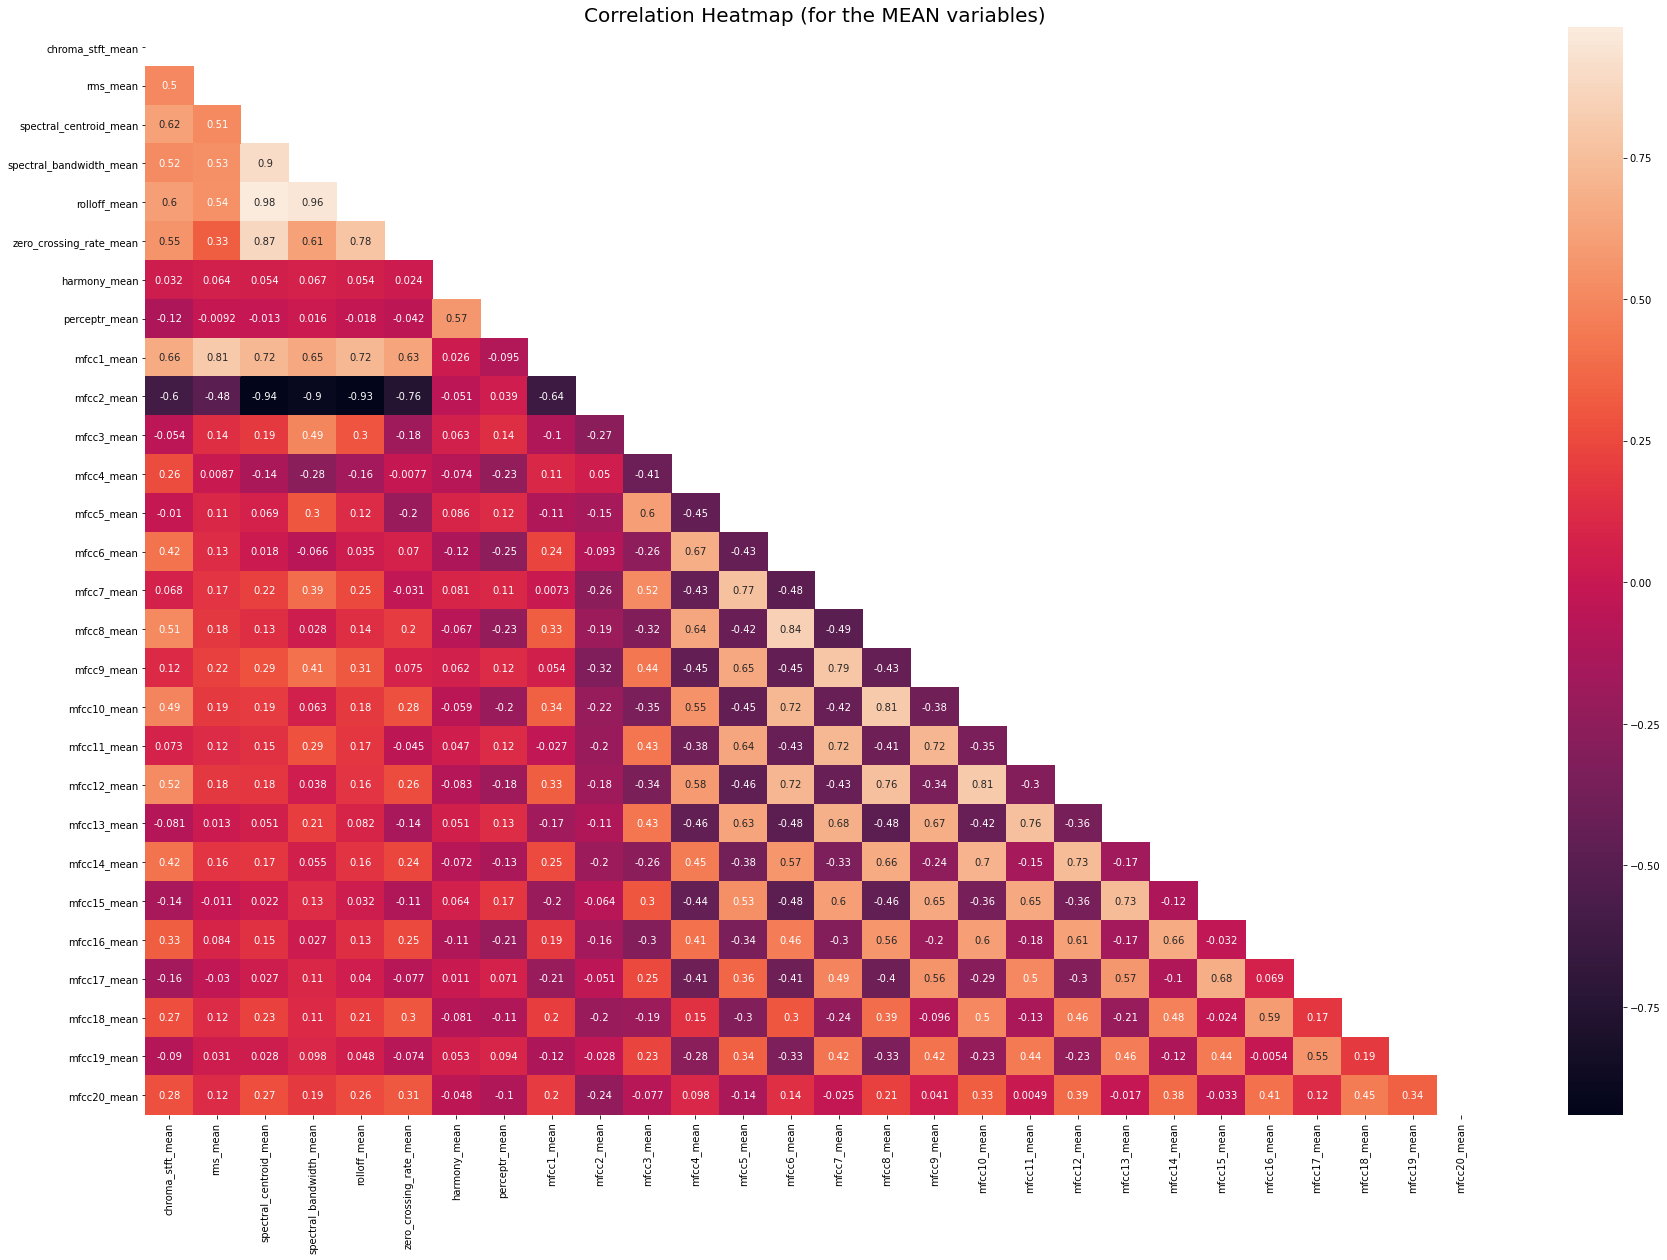

In [10]:
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(30, 20));
sns.heatmap(corr, mask=mask, annot = True)
plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)

Text(0.5, 1.0, 'Correlation Heatmap (for the VAR variables)')

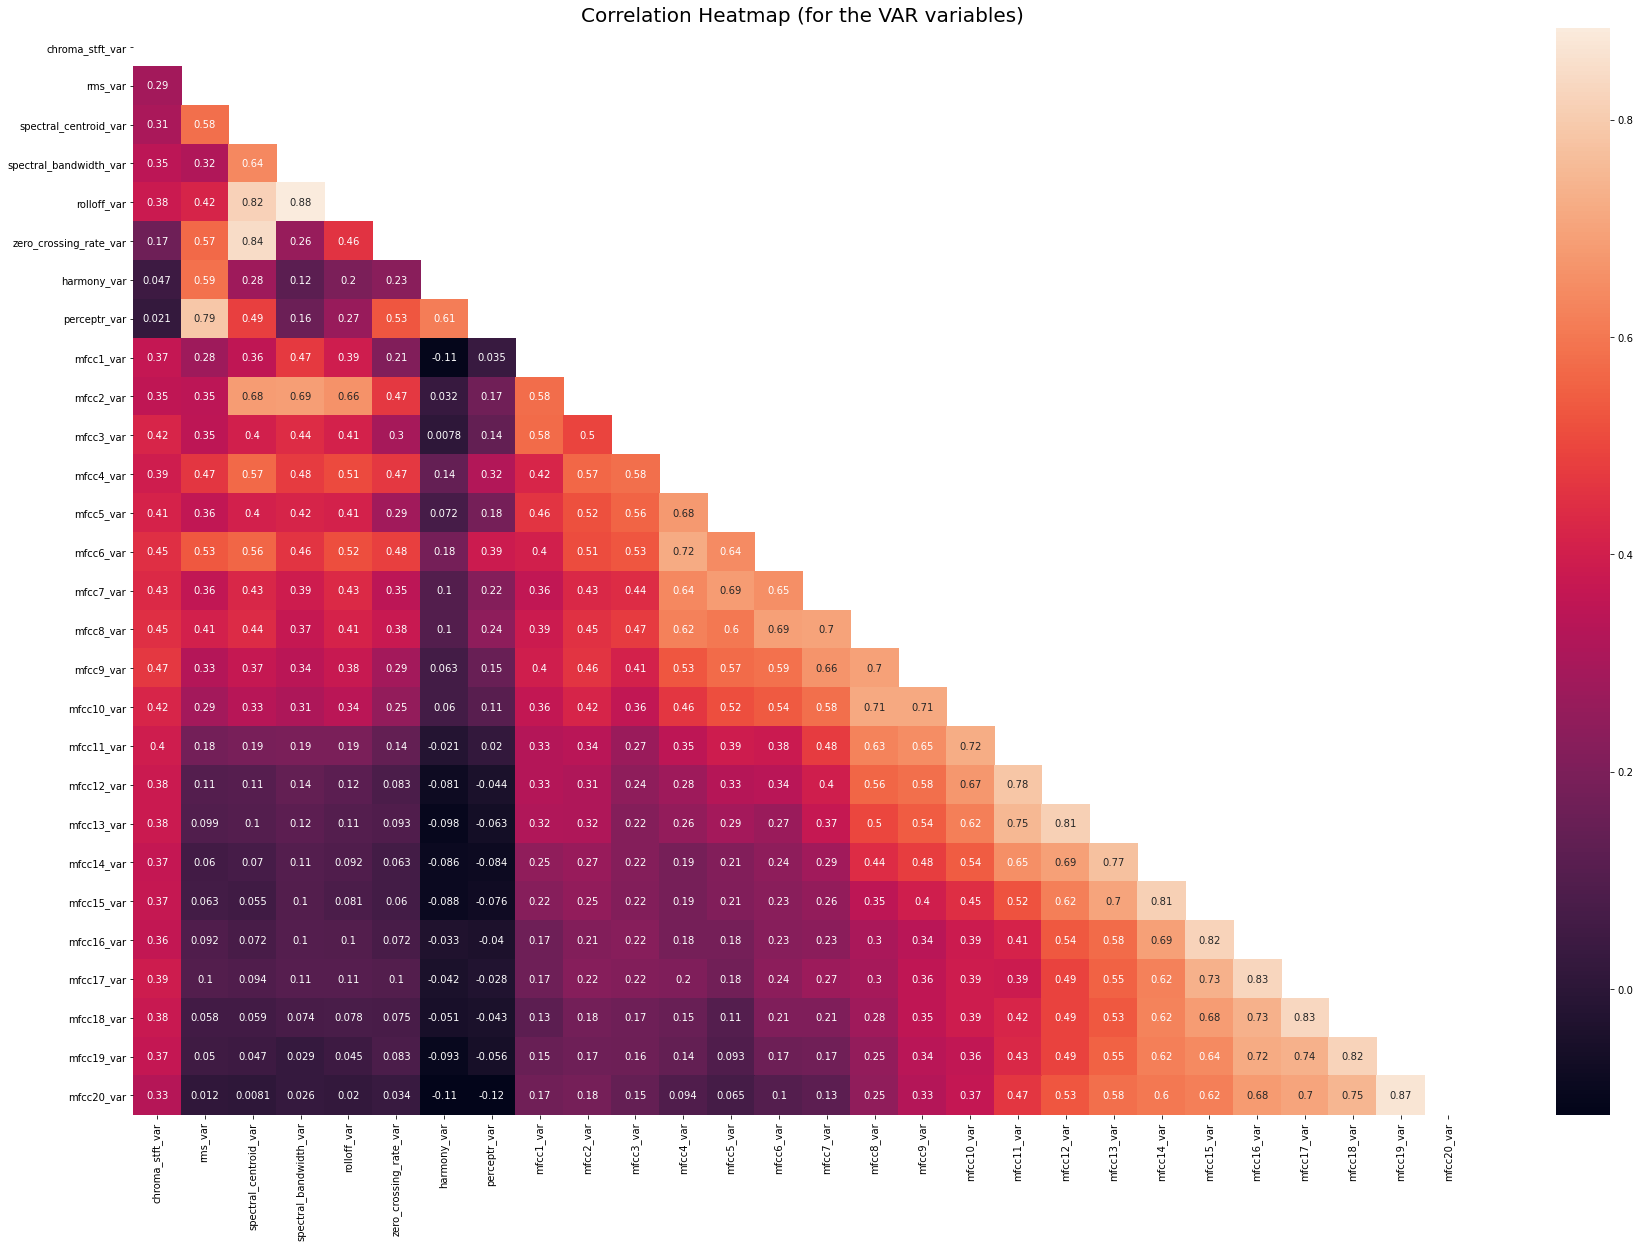

In [11]:
spike_cols = [col for col in df.columns if 'var' in col]
corr = df[spike_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(30, 20));
sns.heatmap(corr, mask=mask, annot = True)
plt.title('Correlation Heatmap (for the VAR variables)', fontsize = 20)

In [12]:
x = df.drop(['filename', 'label'], axis = 1)
y = df['label']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 101)

In [15]:
model = RandomForestClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest)

0.788

In [16]:
model.score(xtrain, ytrain)

0.9986666666666667

In [17]:
feature_imp = pd.Series(model.feature_importances_*100, index=x.columns).sort_values(ascending=False)
# sns.set_style('darkgrid')
# plt.figure(figsize=(30, 30))
# sns.barplot(x = feature_imp, y = feature_imp.index)
# plt.xlabel("Features Importance")
# plt.ylabel("Features")
# plt.show()
feature_imp

chroma_stft_mean           4.777383
perceptr_var               4.246403
length                     3.366053
chroma_stft_var            3.066514
rms_mean                   2.901623
mfcc4_mean                 2.864530
mfcc1_mean                 2.627039
rms_var                    2.576253
spectral_bandwidth_mean    2.557747
mfcc5_var                  2.452316
spectral_centroid_var      2.362216
rolloff_mean               2.090555
mfcc9_mean                 2.076113
harmony_var                2.019007
mfcc6_mean                 1.949960
zero_crossing_rate_mean    1.943894
spectral_centroid_mean     1.918714
rolloff_var                1.711339
mfcc17_mean                1.695344
mfcc8_mean                 1.688109
mfcc2_mean                 1.681668
mfcc7_var                  1.675245
mfcc20_var                 1.665439
mfcc1_var                  1.655114
mfcc10_mean                1.649579
mfcc12_mean                1.627805
mfcc4_var                  1.604052
mfcc6_var                  1

In [18]:
x = df[['perceptr_var', 'chroma_stft_mean', 'length', 'spectral_bandwidth_mean', 'mfcc4_mean', 'harmony_var', 'chroma_stft_var', 'mfcc1_mean',
        'mfcc5_var', 'spectral_centroid_var', 'mfcc6_mean', 'mfcc9_mean', 'mfcc4_var', 'perceptr_mean', 'mfcc10_var', 'mfcc17_mean', 'mfcc20_var', 'mfcc3_var',
         'harmony_mean']]
y = df['label']

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 101)
model = RandomForestClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest)

0.804

In [20]:
model.score(xtrain, ytrain)

0.9986666666666667